# MLP Regression
## Module import

In [13]:
import os
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

## Fit default model on different sample windows

In [14]:
# Set the directory containing the CSV files
input_dir = '../../1-preprocessing/data/9-splits/USD'

# Create DataFrames to store the results
train_mse_results = pd.DataFrame(columns=['Offset', 'MSE'])
train_mae_results = pd.DataFrame(columns=['Offset', 'MAE'])
train_mape_results = pd.DataFrame(columns=['Offset', 'MAPE'])

test_mse_results = pd.DataFrame(columns=['Offset', 'MSE'])
test_mae_results = pd.DataFrame(columns=['Offset', 'MAE'])
test_mape_results = pd.DataFrame(columns=['Offset', 'MAPE'])

# Loop through the files in the directory
# for offset in os.listdir(input_dir):
for offset in ['1','10','20','30','40','50','60','70','80','90','100','110','120','130','140','150']:
    train_data = pd.read_csv(os.path.join(input_dir, offset, "train_data.csv"))
    test_data = pd.read_csv(os.path.join(input_dir, offset, "test_data.csv"))
    
    # Split the data into features and target
    X_train = train_data.iloc[:, 1:-1]
    y_train = train_data.iloc[:, -1]
    X_test = test_data.iloc[:, 1:-1]
    y_test = test_data.iloc[:, -1]
    
    # Fit the MLPRegressor model
    model = MLPRegressor(
        hidden_layer_sizes=(100),
        activation="tanh",  # Changed from 'Relu'
        solver="adam",
        alpha=0.0001,
        batch_size="auto",
        learning_rate="constant",
        learning_rate_init=0.001,
        power_t=0.5,
        max_iter=100,  # Default: 200
        shuffle=True,
        random_state=None,
        tol=1e-4,
        verbose=False,
        warm_start=False,
        momentum=0.9,
        nesterovs_momentum=True,
        early_stopping=False,
        validation_fraction=0.1,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-8,
        n_iter_no_change=10,
        max_fun=15000
    )
    
    model.fit(X_train, y_train)

    
    # Training set prediction evaluation

    # Predict the training set
    y_train_pred = model.predict(X_train)
    
    # Calculate the Mean Squared Error (MSE)
    train_mse = mean_squared_error(y_train, y_train_pred)

    # Calculate the Mean Absolute Error (MAE)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    # Calculate the Mean Absolute Percentage Error (MAPE)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

    # Add the results to the DataFrames
    train_mse_results = pd.concat([train_mse_results, pd.DataFrame({'Offset': [int(offset)], 'MSE': [train_mse]})])
    train_mae_results = pd.concat([train_mae_results, pd.DataFrame({'Offset': [int(offset)], 'MAE': [train_mae]})])
    train_mape_results = pd.concat([train_mape_results, pd.DataFrame({'Offset': [int(offset)], 'MAPE': [train_mape]})])
    

    # Test set prediction evaluation

    # Predict the test set
    y_test_pred = model.predict(X_test)
    
    # Calculate the Mean Squared Error (MSE)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Calculate the Mean Absolute Error (MAE)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Calculate the Mean Absolute Percentage Error (MAPE)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    # Add the results to the DataFrames
    test_mse_results = pd.concat([test_mse_results, pd.DataFrame({'Offset': [int(offset)], 'MSE': [test_mse]})])
    test_mae_results = pd.concat([test_mae_results, pd.DataFrame({'Offset': [int(offset)], 'MAE': [test_mae]})])
    test_mape_results = pd.concat([test_mape_results, pd.DataFrame({'Offset': [int(offset)], 'MAPE': [test_mape]})])

    print(f"{offset}, ", end='')

print()
print('Calculations complete')

1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 
Calculations complete


## Plot MSE and MAE

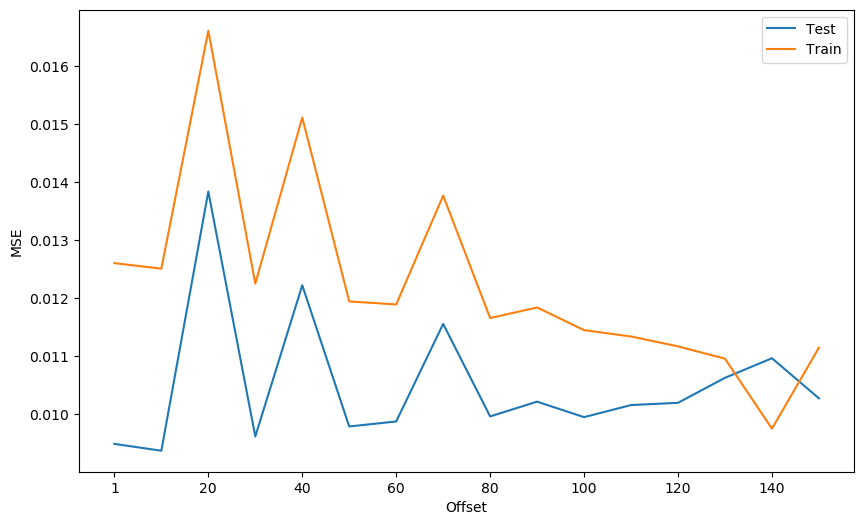

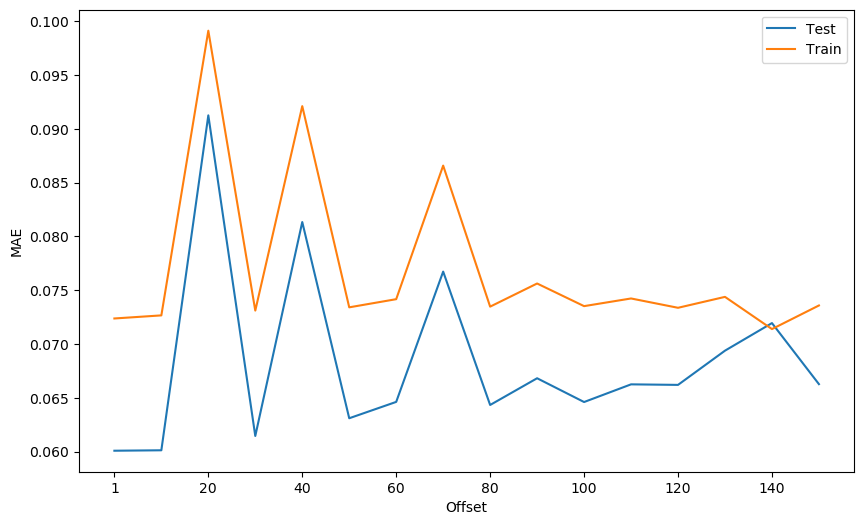

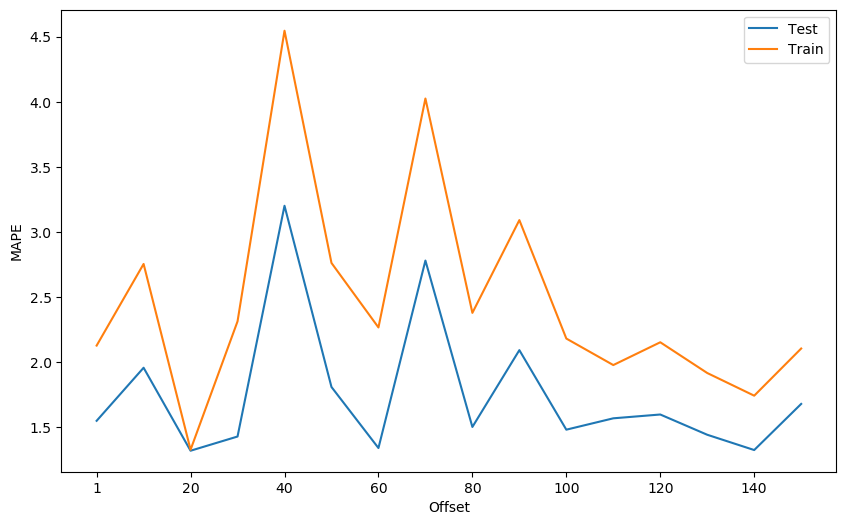

In [15]:
# MSE

test_sorted_mse = test_mse_results.sort_values(by='Offset')
train_sorted_mse = train_mse_results.sort_values(by='Offset')

# Individual plots
# test_sorted_mse.plot(title='Test MSE', x='Offset')
# train_sorted_mse.plot(title='Train MSE', x='Offset')

fig, ax = plt.subplots(figsize=(10, 6))
test_sorted_mse.plot(x='Offset', ax=ax)
train_sorted_mse.plot(x='Offset', ax=ax)
ax.legend(['Test', 'Train'])
ax.set_xlabel('Offset')
ax.set_ylabel('MSE')
plt.show()

# MAE

test_sorted_mae = test_mae_results.sort_values(by='Offset')
train_sorted_mae = train_mae_results.sort_values(by='Offset')

# Individual plots
# test_sorted_mae.plot(title='Test MAE', x='Offset')
# train_sorted_mae.plot(title='Train MAE', x='Offset')

fig, ax = plt.subplots(figsize=(10, 6))
test_sorted_mae.plot(x='Offset', ax=ax)
train_sorted_mae.plot(x='Offset', ax=ax)
ax.legend(['Test', 'Train'])
ax.set_xlabel('Offset')
ax.set_ylabel('MAE')
plt.show()

# MAPE

test_sorted_mape = test_mape_results.sort_values(by='Offset')
train_sorted_mape = train_mape_results.sort_values(by='Offset')

# Individual plots
# test_sorted_mape.plot(title='Test MAPE', x='Offset')
# train_sorted_mape.plot(title='Train MAPE', x='Offset')

fig, ax = plt.subplots(figsize=(10, 6))
test_sorted_mape.plot(x='Offset', ax=ax)
train_sorted_mape.plot(x='Offset', ax=ax)
ax.legend(['Test', 'Train'])
ax.set_xlabel('Offset')
ax.set_ylabel('MAPE')
plt.show()

## Save results to a CSV file

In [12]:
train_sorted_mse.to_csv('train_mse.csv', index=False)
test_sorted_mse.to_csv('test_mse.csv', index=False)

train_sorted_mae.to_csv('train_mae.csv', index=False)
test_sorted_mae.to_csv('test_mae.csv', index=False)

train_sorted_mape.to_csv('train_mape.csv', index=False)
test_sorted_mape.to_csv('test_mape.csv', index=False)